# Core: PCA Exercise
Jude Maico Jr.

## 1. Load the Data
iYou can load the dataset using this code:

In [1]:
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [3]:
# X features
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# y features
y = mnist.target
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## 2. Prepare the Data

Prepare the data for modeling. Scale and apply PCA to your data, while retaining 95% of the variance. Be sure not to leak information.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)

In [6]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,52500.0,52500.0,52500.0,52500.0,52500.0,52500.0,52500.0,52500.0,52500.0,52500.0,...,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.0,52500.0,52500.0,52500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204210,0.108914,0.050476,0.018248,0.016857,0.002286,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.113057,4.512382,2.853677,1.625037,1.791585,0.370530,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
# pca scaler
scaler = StandardScaler()

# pca with 95% variance
pca = PCA(n_components = .95)

pca_processing = make_pipeline(scaler, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_processing.fit_transform(X_train).shape)
print('Column count reduced by: ', 
      X_train.shape[1] - pca_processing.fit_transform(X_train).shape[1])

Shape before PCA: (52500, 784)
Shape after PCA: (52500, 329)
Column count reduced by:  455


## 3. Create 2 KNN models.
a. One that uses the PCA transformed data to predict which number each image shows.

b. One that uses the original data, without the PCA transformation (but, remember you still need to scale the data!)

### Orginal Data

In [8]:
%%time
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(StandardScaler(), knn)
knn_pipe.fit(X_train, y_train)

CPU times: total: 688 ms
Wall time: 618 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

### with PCA Data

In [9]:
%%time
knn_pca = KNeighborsClassifier()
knn_pca_pipe = make_pipeline(StandardScaler(), pca, knn_pca)
knn_pca_pipe.fit(X_train, y_train)

CPU times: total: 18.9 s
Wall time: 3.28 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [10]:
#for evaluation
def eval_classification(model):
  print('Train Report:', classification_report(y_train, 
                                               model.predict(X_train)))
  print('Test Report:', classification_report(y_test, 
                                              model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

## 4. Evaluate and compare the models.
Use separate cells to make predictions using each model. Include the cell magic command: `%%time` at the top of your cells when making predictions to see which model can create predictions faster, the one trained on PCA data or the one trained on non-PCA data. Evaluate both models using multiple appropriate metrics.

'%%time' will output under the cell a count of how long it takes the code in that cell to run.

### Non-PCA Data

Train Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5177
           1       0.96      0.99      0.98      5908
           2       0.96      0.96      0.96      5242
           3       0.95      0.96      0.96      5356
           4       0.97      0.95      0.96      5118
           5       0.95      0.95      0.95      4735
           6       0.97      0.98      0.98      5157
           7       0.96      0.96      0.96      5470
           8       0.98      0.92      0.95      5119
           9       0.94      0.95      0.95      5218

    accuracy                           0.96     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.96      0.96      0.96     52500

Test Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1726
           1       0.95      0.99      0.97      1969
           2       0.96      0.94      0.95      17

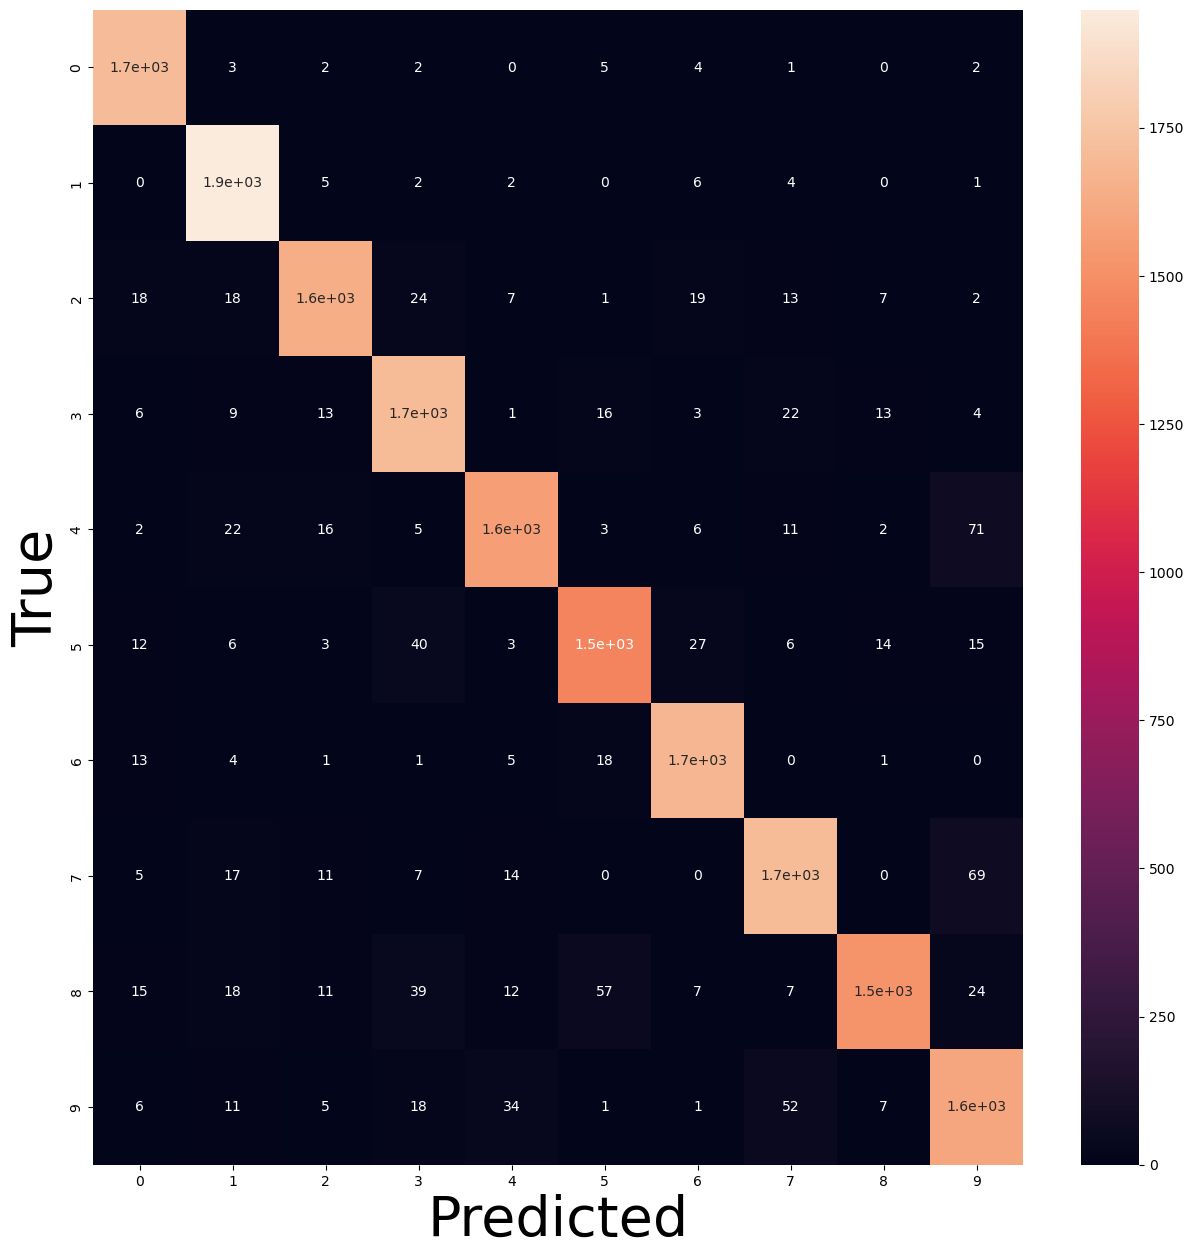

CPU times: total: 10min 38s
Wall time: 45.9 s


In [11]:
%%time
eval_classification(knn_pipe)

### PCA Data

Train Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5177
           1       0.97      0.99      0.98      5908
           2       0.96      0.96      0.96      5242
           3       0.95      0.97      0.96      5356
           4       0.97      0.96      0.96      5118
           5       0.95      0.95      0.95      4735
           6       0.97      0.98      0.98      5157
           7       0.96      0.96      0.96      5470
           8       0.98      0.93      0.96      5119
           9       0.95      0.95      0.95      5218

    accuracy                           0.97     52500
   macro avg       0.97      0.96      0.96     52500
weighted avg       0.97      0.97      0.97     52500

Test Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1726
           1       0.96      0.99      0.97      1969
           2       0.96      0.94      0.95      17

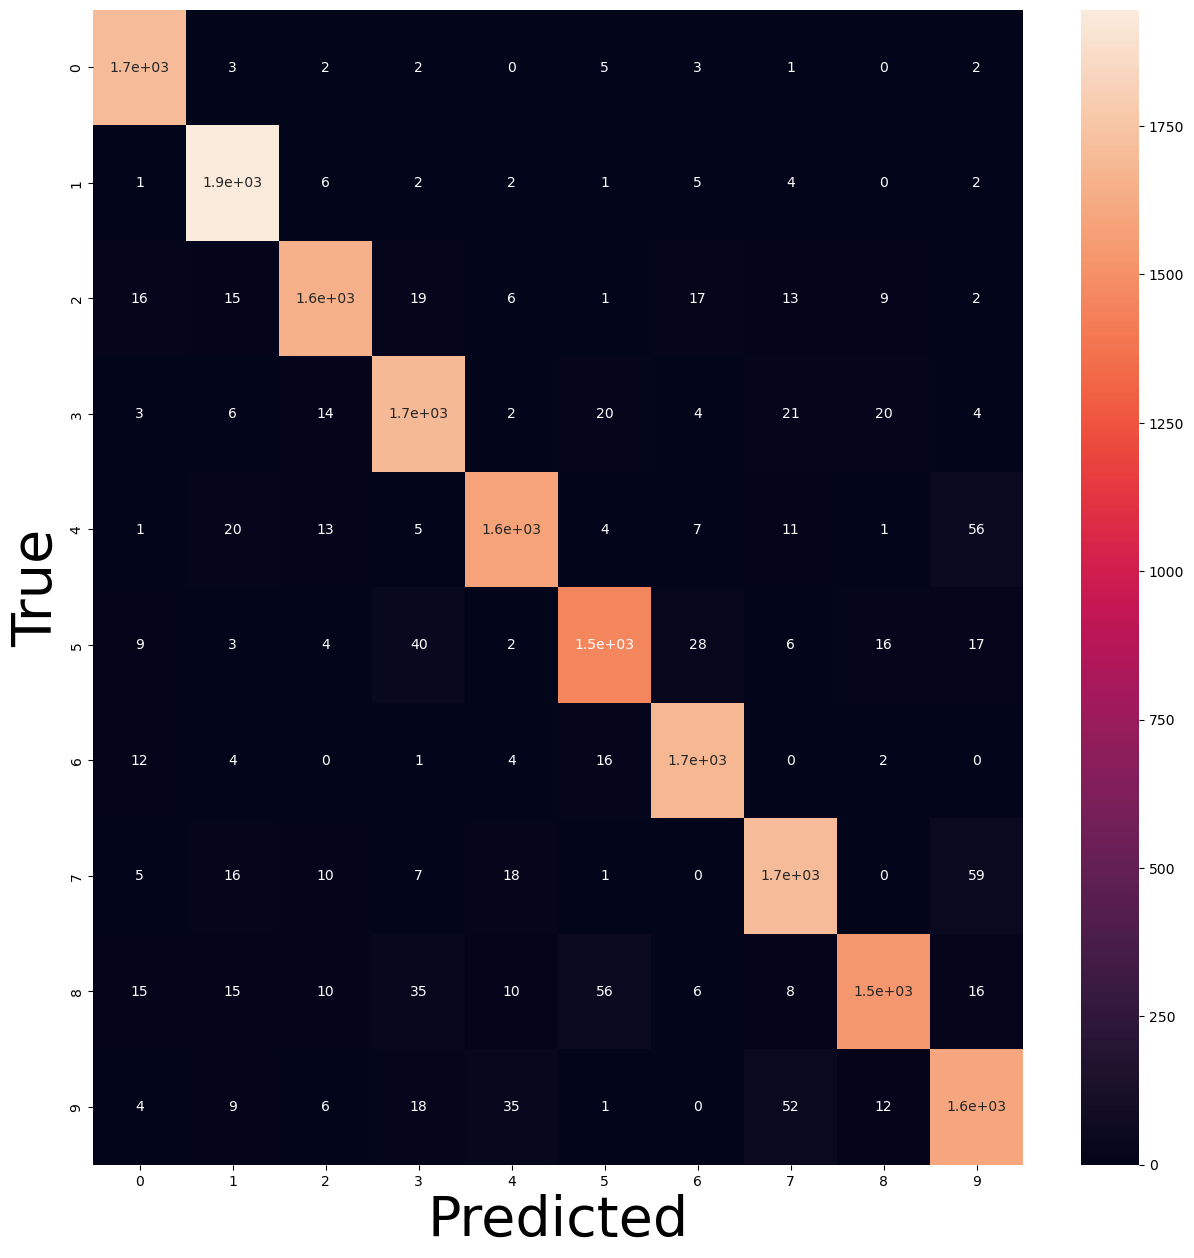

CPU times: total: 4min 12s
Wall time: 20.1 s


In [12]:
%%time
eval_classification(knn_pca_pipe)

## 5. Answer the Following Questions in the Text:
* CPU time - the time actually spent by CPU executing method code. 
*Wall time - the real-world time elapsed between a pair of events, e.g. between method entry and method exit.

a. Which model performed the best on the test set?

    - The data with PCA performs better on test set with 95% Accuracy.

b. Which model was the fastest at making predictions

    - The PCA also performs faster, it has half CPU time than the non-PCA and more than half wall time.